Import biblioteki **TensorFlow** ([https://www.tensorflow.org/](https://www.tensorflow.org/)) z której będziemy korzystali w **uczeniu maszynowym**:

In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt 
import numpy as np

In [20]:
import keras
from keras.models import Sequential
from keras.layers import Dense

**Dwa gangi**

Zbiór danych:

In [21]:
[0]*10+[1]*10

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [22]:
x_label1 = np.random.normal(3, 1, 1000)
y_label1 = np.random.normal(2, 1, 1000) 
x_label2 = np.random.normal(7, 1, 1000)
y_label2 = np.random.normal(6, 1, 1000)

xs = np.append(x_label1, x_label2)
ys = np.append(y_label1, y_label2) 
labels = np.asarray([0.]*len(x_label1)+[1.]*len(x_label2))
labels

array([0., 0., 0., ..., 1., 1., 1.])

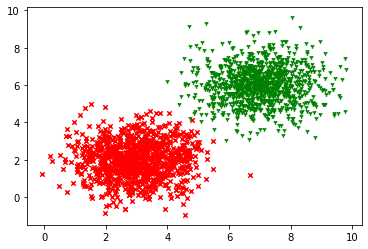

In [23]:
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.show()

In [24]:
x_label1

array([ 4.23123665,  3.97215796,  4.30283564,  2.65275726,  2.82321759,
        4.35483173,  1.89468274,  1.84547987,  2.16378538,  3.01982461,
        2.79143939,  2.65624603,  3.5134666 ,  2.36445479,  2.98750717,
        1.92829127,  1.70399299,  1.97452762,  1.56703833,  1.84791755,
        1.49194503,  1.22498341,  3.78446791,  1.93750999,  4.30383309,
        4.62658988,  2.54252687,  2.21560001,  2.63028664,  3.74679667,
        3.02712392,  3.27943866,  5.26306026,  1.98970235,  2.0904248 ,
        2.48753384,  4.85950274,  2.44774356,  1.78608566,  2.04945871,
        2.92564178,  3.17376296,  2.97286421,  2.8669087 ,  3.29333202,
        3.11520934,  4.57218566,  3.22500579,  2.31422485,  4.39137008,
        1.50280201,  4.57239427,  4.4375615 ,  3.75964388,  4.13624514,
        2.57247844,  1.9301621 ,  4.63623954,  2.82550582,  2.76353707,
        1.3041774 ,  2.99837429,  3.08620106,  4.64110623,  4.26331802,
        3.14055448,  3.35525765,  1.66447619,  3.29193814,  2.66

Definiujemy model:

In [25]:
model = Sequential()

Dodajemy **jedną warstwę** (Dense) z **jednym neuronem** (units=1) z **biasem** (use_bias=True) i **liniową funkcją aktywacji** (activation="linear"):

In [26]:
model.add(Dense(units = 1, use_bias=True, input_dim=2, activation = "sigmoid"))

Definiujemy **optymalizator** i **błąd** (entropia krzyżowa). **Współczynnik uczenia = 0.1**

In [27]:
#opt = tf.keras.optimizers.Adam(learning_rate=0.1)
opt = tf.keras.optimizers.SGD(learning_rate=0.2)

In [28]:
model.compile(loss='binary_crossentropy',optimizer=opt)

Informacja o modelu:

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_1 (Dense)             (None, 1)                 3         
                                                                 
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


Przygotowanie danych:

In [30]:
xs=xs.reshape(-1,1)
ys=ys.reshape(-1,1)
data_points=np.concatenate([xs,ys],axis=1)
data_points

array([[4.23123665, 3.04835709],
       [3.97215796, 1.44368685],
       [4.30283564, 1.42523501],
       ...,
       [7.61607157, 7.0249111 ],
       [7.26977568, 5.194599  ],
       [6.77230854, 4.13097325]])

Proces **uczenia**:

In [31]:
epochs = 100
h = model.fit(data_points,labels, verbose=1, epochs=epochs,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 1s 4ms/step - loss: 0.5446 - val_loss: 0.1986
Epoch 2/100
50/50 [==============================] - 0s 2ms/step - loss: 0.3269 - val_loss: 0.1681
Epoch 3/100
50/50 [==============================] - 0s 2ms/step - loss: 0.2459 - val_loss: 0.1915
Epoch 4/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1915 - val_loss: 0.1065
Epoch 5/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1594 - val_loss: 0.1511
Epoch 6/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1394 - val_loss: 0.1010
Epoch 7/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1229 - val_loss: 0.0717
Epoch 8/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1109 - val_loss: 0.0694
Epoch 9/100
50/50 [==============================] - 0s 2ms/step - loss: 0.1004 - val_loss: 0.0969
Epoch 10/100
50/50 [==============================] - 0s 2ms/step - loss: 0.0934 - val_loss: 0.1080
Epoch 11/

In [32]:
Loss = h.history['loss']
Loss

[0.5446227788925171,
 0.32694998383522034,
 0.2458808869123459,
 0.1915292590856552,
 0.15936028957366943,
 0.13943929970264435,
 0.12285446375608444,
 0.11089848726987839,
 0.10043661296367645,
 0.09342579543590546,
 0.0864352285861969,
 0.08110345900058746,
 0.07647692412137985,
 0.0720415711402893,
 0.06885001808404922,
 0.06521816551685333,
 0.061880141496658325,
 0.06017868593335152,
 0.057779476046562195,
 0.05553879588842392,
 0.0538627989590168,
 0.05178460106253624,
 0.05058921501040459,
 0.04905211552977562,
 0.04742690920829773,
 0.04612345993518829,
 0.04511032626032829,
 0.04365839436650276,
 0.043065059930086136,
 0.0420340970158577,
 0.04096366465091705,
 0.040229376405477524,
 0.03928818181157112,
 0.038512811064720154,
 0.03794822841882706,
 0.03690158203244209,
 0.03645697236061096,
 0.03573014587163925,
 0.03514190763235092,
 0.03472427651286125,
 0.034031204879283905,
 0.03372019901871681,
 0.0329815112054348,
 0.03254763036966324,
 0.031880661845207214,
 0.03148505

Sprawdźmy jakie są **wartości wag**:

In [33]:
weights = model.get_weights()

print(weights[0])
print(weights[1])    #bias

[[1.3021898]
 [1.5386865]]
[-12.82827]


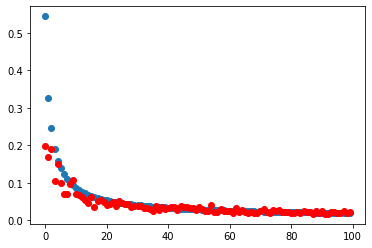

In [34]:
plt.scatter(np.arange(epochs),h.history['loss'])
plt.scatter(np.arange(epochs),h.history['val_loss'],c='r')
plt.show()

Sprawdzamy działanie modelu dla punktu o współrzędnych **x** i **y**:

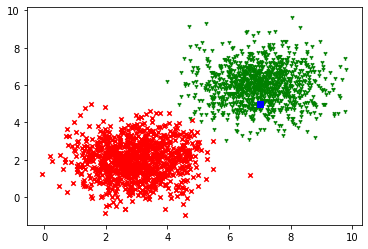

In [35]:
x=7.0
y=5.0 
plt.scatter(x_label1, y_label1, c='r', marker='x', s=20)
plt.scatter(x_label2, y_label2, c='g', marker='1', s=20)
plt.scatter(x,y,c='b', marker='s')
plt.show()

In [36]:
model.predict([[x,y]])

1/1 [==============================] - 0s 49ms/step


array([[0.98166597]], dtype=float32)